# Exploration de la base de données vélib fournie par Depersin et Schreuder

In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from json import loads #pour lire des dicos dans des strings

In [2]:
#path = "velib_358.csv"
#velib = pd.read_csv(path, sep = ';')

In [6]:
def to_dictionary(jour):
    """transformer le format chelou en dico"""

    dia = '{' + jour[2:-2].replace('{','').replace('}','').replace("'",'"') + '}'
    try :
        dictionary = loads(dia)
    except:
        dictionary = {'mechanical': 0, 'ebike': 0}
    
    return dictionary

#col = velib.columns

In [ ]:
#velib = velib.set_index("station_id")

In [7]:
#velib.head()

# Pour connaître le nom du projet et son fuseau horaire : table `system_formation` avec :
- language : langue utilisée dans l’ensemble des fichiers
- name : nom du système
- system_id : identifiant unique du système
- timezone : zone horaire associée au système
- url :adresse associée au système
- lastUpdatedOther : date de dernière mis-à jour des informations de la ville
- ttl : « time to live » , durée de vie de l’information au-delà de laquelle elle doit être considérée comme obsolète


In [8]:
import urllib.request
import json
from pandas.io.json import json_normalize

request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/system_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data'])
df_station_info.head()

,system_id,name,url,timezone,language
0,Paris,Paris,,Europe/Paris,en


# Pour connaître les flux existants : la table `gbfs`



In [9]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/gbfs.json')
response = urllib.request.urlopen(request)
flux_existants = response.read()
data = json.loads(flux_existants)
df_flux = json_normalize(data['data']['en']['feeds'])
df_flux

,name,url
0,gbfs,https://velib-metropole-opendata.smoove.pro/op...
1,system_information,https://velib-metropole-opendata.smoove.pro/op...
2,station_information,https://velib-metropole-opendata.smoove.pro/op...
3,station_status,https://velib-metropole-opendata.smoove.pro/op...


# Information sur les stations avec la table `station_information` : 
- capacity : nombre de bornettes dans la station
- lat : latitude de la station (au format WGS84)
- lon : longitude de la station (au format WGS84)
- name : nom de la station
- station_id : identifiant unique associé à la station. Ce numéro identifie la station au sein du service Vélib’ Métropole

In [36]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data']['stations'])
df_station_info = df_station_info.sort_values(by = 'capacity', ascending = False)
df_station_info = df_station_info.reset_index()
df_station_info.head()

,index,station_id,name,lat,lon,capacity,stationCode,rental_methods
0,891,389788858,Emeriau - Beaugrenelle,48.847912,2.284306,74,15030,[CREDITCARD]
1,53,85008390,Grenelle - Dr Finlay,48.851315,2.291950,71,15028,[CREDITCARD]
2,485,76199110,Université Paris Dauphine,48.870708,2.274866,70,16004,[CREDITCARD]
3,795,100783424,Censier - Santeuil,48.840659,2.353752,69,5034,[CREDITCARD]
4,1312,54000610,Jean de la Fontaine - Boulainvilliers,48.852648,2.275866,68,16025,[CREDITCARD]


# Nombre de vélos et de bornettes disponibles par station avec la table `stations_status` avec :
- station_id: numéro unique d’identification de la station. Ce numéro identifie la station au sein du service Vélib’ Métropole
- is_installed: variable binaire indiquant si la station est. La station a déjà été déployée (1) ou est encore en cours de déploiement (0) 
- is_renting: variable binaire indiquant si la station peut louer des vélos (is_renting=1 si le statut de la station est Operative)
- is_returning: variable binaire indiquant si la station peut recevoir des vélos (is_renting=1 si le statut de la station est Operative)
- last_reported : date de la dernière mise-à-jour 
- numBikesAvailable: nombre de vélos disponibles
- numDocksAvailable: nombre de bornettes disponibles
- num_bikes_available: nombre de vélos disponibles
- num_bikes_available_types: nombre de vélos disponibles avec distinctions entre Vélib’ mécanique et électrique

In [11]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_status.json')
response = urllib.request.urlopen(request)
velib_stations = response.read()
data = json.loads(velib_stations)
df = json_normalize(data['data']['stations'])
df


,stationCode,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported
0,16107,213688169,6,6,"[{'mechanical': 3}, {'ebike': 3}]",29,29,1,1,1,1605785669
1,6015,99950133,14,14,"[{'mechanical': 10}, {'ebike': 4}]",41,41,1,1,1,1605785611
2,11104,516709288,2,2,"[{'mechanical': 2}, {'ebike': 0}]",18,18,1,1,1,1605785561
3,9020,36255,2,2,"[{'mechanical': 1}, {'ebike': 1}]",18,18,1,1,1,1605785523
4,12109,37815204,12,12,"[{'mechanical': 10}, {'ebike': 2}]",17,17,1,1,1,1605785747
...,...,...,...,...,...,...,...,...,...,...,...
1392,12039,27415004,25,25,"[{'mechanical': 24}, {'ebike': 1}]",13,13,1,1,1,1605785720
1393,13037,27415128,5,5,"[{'mechanical': 3}, {'ebike': 2}]",15,15,1,1,1,1605785426
1394,12017,27414937,5,5,"[{'mechanical': 2}, {'ebike': 3}]",31,31,1,1,1,1605785763
1395,13013,66507230,10,10,"[{'mechanical': 10}, {'ebike': 0}]",11,11,1,1,1,1605785634


Dans ce dataframe `df`, on peut rajouter 2 colonnes : mechanical & ebike au lieu de `num_bikes_available_types`

# Affichage des stations sur une carte de la France

In [37]:
# Création d'un géodataframe avec les données de géolocalisation des stations vélib
gdf = gpd.GeoDataFrame(
    df_station_info[['name' , 'capacity']], geometry=gpd.points_from_xy(df_station_info.lon, df_station_info.lat))
gdf = gdf.sort_values(by = 'capacity', ascending = False)
gdf = gdf.reset_index()
gdf.head()

,index,name,capacity,geometry
0,0,Emeriau - Beaugrenelle,74,POINT (2.28431 48.84791)
1,1,Grenelle - Dr Finlay,71,POINT (2.29195 48.85132)
2,2,Université Paris Dauphine,70,POINT (2.27487 48.87071)
3,3,Censier - Santeuil,69,POINT (2.35375 48.84066)
4,4,Jean de la Fontaine - Boulainvilliers,68,POINT (2.27587 48.85265)


In [18]:
import requests
import tempfile
import zipfile

url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
        zip_ref.extractall(dirname + '/' + destname)
        
download_unzip(url)
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")

communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes_borders.crs

communes['dep'] = communes.insee.str[:2]

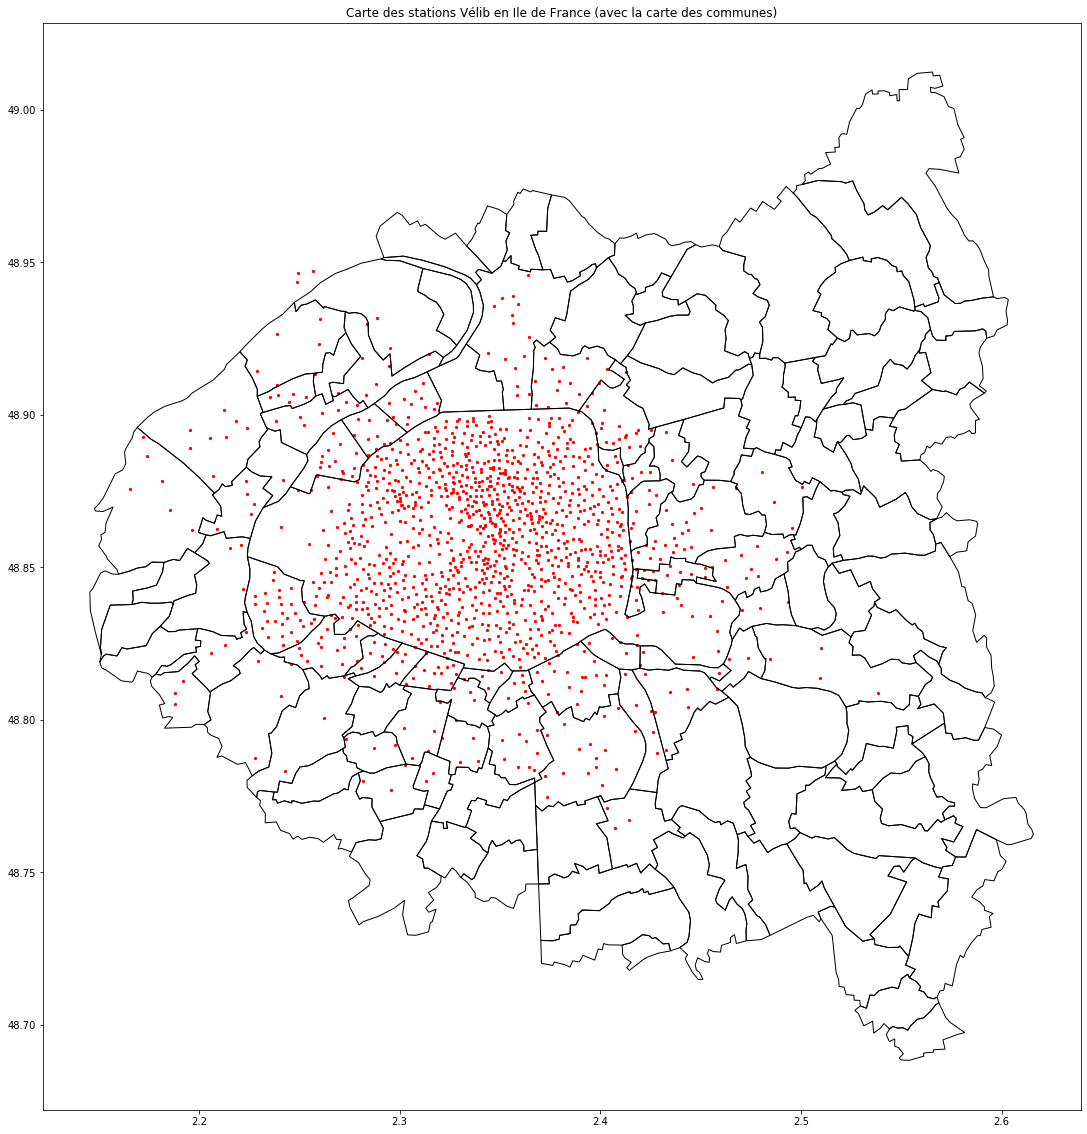

In [39]:
# Affichage de la carte de l'Ile de France avec ses départements
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.set_aspect('equal')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
communes[communes['dep'].isin(['75','92','93','94'])].plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_title("Carte des stations Vélib en Ile de France (avec la carte des communes)");

# Affichage du marqueur des stations avec `folium`

In [69]:
import folium

# Titre : 
loc = 'Les 25 stations Velib qui ont la plus grande capacite (en rouge) et la plus faible (en bleu)'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

stations_velib_paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12) # On centre sur Paris
for i in range(25): # Affichage des 25 stations qui ont la plus grosse capacité
    folium.Marker(
        np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
        popup = gdf['name'][i], 
        icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(stations_velib_paris)
    folium.CircleMarker(
        np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
        popup = gdf['name'][i], 
        tooltip = gdf['capacity'][i],
        radius = float(gdf['capacity'][i]) / 8,
        opacity = 1,
        weight = 3,
        color = 'red',
        fillColor = 'red'
        ).add_to(stations_velib_paris)


for i in range(1370,1396): # Affichage des 25 stations qui ont la plus grosse capacité
    folium.Marker(
        np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
        popup = gdf['name'][i], 
        icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(stations_velib_paris)
    
    if gdf['capacity'][i] == 0:
        folium.CircleMarker(
            np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
            popup = gdf['capacity'][i], 
            tooltip = gdf['capacity'][i],
            weight = 1,
            radius = float(1)
        ).add_to(stations_velib_paris)
    else:
        folium.CircleMarker(
            np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
            popup = gdf['capacity'][i], 
            tooltip = gdf['capacity'][i],
            weight = 1,
            radius = float(2)
        ).add_to(stations_velib_paris)

stations_velib_paris.get_root().html.add_child(folium.Element(title_html))

stations_velib_paris

Une première tendance se dégage : 
- Les stations qui ont la plus grande capacite sont concentrées **au centre de Paris et dans les principales villes voisines** (Levallois, Boulogne Billancourt, Aubervilliers, Nogent)
- Les stations qui ont la moins grande capacité sont globalement **excentrées dans Paris**.

In [84]:
# Titre : 
loc = 'Les 50 stations Velib a Paris qui ont la plus grande capacite (en rouge) et la plus faible (en bleu)'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

stations_velib_paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 13) # On centre sur Paris
for i in range(50): # Affichage des 25 stations qui ont la plus grosse capacité
    folium.CircleMarker(
        np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
        popup = gdf['name'][i], 
        tooltip = gdf['capacity'][i],
        radius = float(gdf['capacity'][i]) / 8,
        opacity = 1,
        weight = 3,
        color = 'red',
        fillColor = 'red'
        ).add_to(stations_velib_paris)


for i in range(1345,1396): # Affichage des 25 stations qui ont la moins grosse capacité
    
    if gdf['capacity'][i] == 0:
        folium.CircleMarker(
            np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
            popup = gdf['capacity'][i], 
            tooltip = gdf['capacity'][i],
            color = 'blue',
            weight = 3,
            radius = float(0.05)
        ).add_to(stations_velib_paris)
    else:
        folium.CircleMarker(
            np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
            popup = gdf['capacity'][i], 
            tooltip = gdf['capacity'][i],
            weight = 3,
            color = 'blue',
            radius = float(gdf['capacity'][i]) / 8
        ).add_to(stations_velib_paris)

stations_velib_paris.get_root().html.add_child(folium.Element(title_html))

stations_velib_paris

Une nouvelle tendance se dégage : 
- Les grosses stations Vélib ont relativement toutes la même capacité
- On observe une fracture entre le nord et le sud de la ville de Paris : au sud majoritairement les grosses stations, au nord les petites.